In [11]:
import pickle
data = pickle.load(open("trace_profiling/task_traces.pkl", "rb"))

In [14]:
from browsergym.workarena.tasks.list import FilterAssetListTask

In [19]:
len(data[FilterAssetListTask][0])

8

In [1]:
import os
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\17817\\AppData\\Roaming',
        'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_31636_AXTTZLVAQPBVQHVJ',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'CYH',
        'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
        'CONDA_ALLOW_SOFTLINKS': 'false',
        'CONDA_DEFAULT_ENV': 'workarena',
        'CONDA_EXE': 'D:\\anaconda3\\Scripts\\conda.exe',
        'CONDA_EXES': '"D:\\anaconda3\\condabin\\..\\Scripts\\conda.exe"  ',
        'CONDA_PREFIX': 'D:\\anaconda3\\envs\\workarena',
        'CONDA_PROMPT_MODIFIER': '(workarena) ',
        'CONDA_PYTHON_EXE': 'D:\\anaconda3\\python.exe',
        'CONDA_ROOT': 'D:\\anaconda3',
        'CONDA_SHLVL': '1',
        'DISPLAY': 'cyh:0.0',
        'DRIVERDATA': 'C:\\Windows\\System

In [24]:
import logging
logging.info("HEllo")

In [52]:
import pickle
data = pickle.load(open("trace_profiling/task_traces.pkl", "rb"))

In [8]:
from browsergym.workarena.tasks import form
from browsergym.workarena.tasks import list as wa_list

tasks = [
    wa_list.FilterAssetListTask,
    wa_list.FilterChangeRequestListTask,
    wa_list.FilterHardwareListTask,
    wa_list.FilterServiceCatalogItemListTask,
    wa_list.FilterUserListTask,
    wa_list.SortAssetListTask,
    wa_list.SortChangeRequestListTask,
    wa_list.SortHardwareListTask,
    wa_list.SortIncidentListTask,
    wa_list.SortServiceCatalogItemListTask,
    wa_list.SortUserListTask,
    form.CreateChangeRequestTask,
    form.CreateIncidentTask,
    form.CreateHardwareAssetTask,
    form.CreateProblemTask,
    form.CreateUserTask
]

In [58]:
from PIL import Image
Image.fromarray(data[form.CreateChangeRequestTask][0][0]["obs"]["screenshot"]).show()

In [14]:
import os
tasks[0].__name__

'FilterAssetListTask'

In [51]:
from PIL import  Image
import json

for task in tasks:
    for i, traj in enumerate(data[task]):
        base_dir = os.path.join("trajectories", task.__name__, str(i))
        os.makedirs(base_dir, exist_ok=True)
        traj_json = []
        prev_action = []
        goal = traj[0]["obs"]["goal"].strip()
        for i in range(len(traj)):
            image = Image.fromarray(traj[i]["obs"]["screenshot"])
            image.save(os.path.join(base_dir, f"{i}.png"))
            extra = traj[i]["obs"]["extra_element_properties"]
            action = traj[i]["action"]
            if action == "click":
                bid = traj[i]["bid"]
                bbox = extra[bid]["bbox"]
                x = int(bbox[0] + bbox[2] / 2)
                y = int(bbox[1] + bbox[3] / 2)
                action = f"click({x}, {y})"
            elif action == "fill":
                bid = traj[i]["bid"]
                bbox = extra[bid]["bbox"]
                x = int(bbox[0] + bbox[2] / 2)
                y = int(bbox[1] + bbox[3] / 2)
                args = traj[i]["args"]
                assert len(args) == 1
                action = f"click({x}, {y})\ntype(\"{args[0]}\")"
            elif action == "select_option":
                bid = traj[i]["bid"]
                bbox = extra[bid]["bbox"]
                x = int(bbox[0] + bbox[2] / 2)
                y = int(bbox[1] + bbox[3] / 2)
                args = traj[i]["args"]
                assert len(args) == 1
                action = f"select_option({x}, {y}, options=\"{args[0]}\")"
            elif action == "press":
                args = traj[i]["args"]
                assert len(args) == 1
                action = f"press(\"{args[0]}\")"
            elif action == "set_checked":
                bid = traj[i]["bid"]
                bbox = extra[bid]["bbox"]
                x = int(bbox[0] + bbox[2] / 2)
                y = int(bbox[1] + bbox[3] / 2)
                action = f"click({x}, {y})"
            else:
                raise ValueError(f"Unknown action: {action}")
            
            if len(prev_action) > 0:
                prev_action_str = "\n".join(prev_action)
            else:
                prev_action_str = "None"

            prev_action.append(action)

            step_json = {
                "image": os.path.join(base_dir, f"{i}.png"),
                "conversations": [
                    {
                        "from": "system",
                        "value": "You are a GUI agent."
                    },
                    {
                        "from": "human",
                        "value": f"<image>\nPlease generate the next move according to the UI screenshot, instruction and previous actions.\n\nInstruction:{goal}\n\nPrevious actions:\n{prev_action_str}"
                    },
                    {
                        "from": "gpt",
                        "value": action
                    }
                ]
            }
            traj_json.append(step_json)
        json.dump(traj_json, open(os.path.join(base_dir, "traj.json"), "w"), indent=2)



In [45]:
traj = data[form.CreateChangeRequestTask][0]
for i in range(len(traj)):
    print(traj[i]["action"])
    print(traj[i]["args"])
    print(traj[i]["kwargs"])
    print(traj[i]["bid"])

click
()
{'force': True}
a199
fill
('CHG0000087',)
{}
a199
click
()
{'force': True}
a485
fill
('Databas',)
{}
a485
press
('e',)
{}
keyboard
click
()
{}
a1510
click
()
{'force': True}
a526
fill
('A failed RAID controller card needs to be replaced on PSORA1',)
{}
a526
click
()
{'force': True}
a568
click
()
{'force': True}
a674
fill
('antefurcal argal overcivilize thresherman zephyrus',)
{}
a674
click
()
{'force': True}
a279
fill
('',)
{}
a279
click
()
{'force': True}
a568
click
()
{'force': True}
a659
fill
('tithonic analgic warmable thyroideal coraise',)
{}
a659
click
()
{'force': True}
a299
fill
('',)
{}
a299
click
()
{}
a91


In [35]:
from PIL import Image
image = Image.fromarray(traj[2]["obs"]["screenshot"])
image.show()

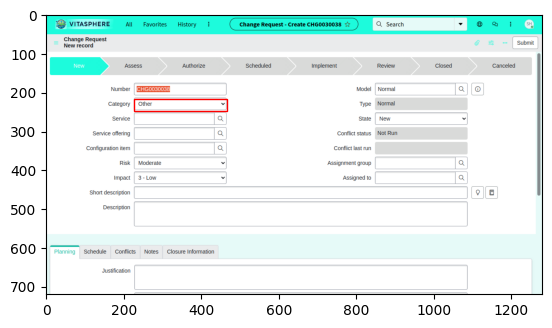

In [71]:
box = [227,215,239,32]
# 在图片上绘制出这个矩形框
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
image = Image.open("a.png")
fig, ax = plt.subplots(1)
ax.imshow(image)
rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()


In [1]:
from openai import OpenAI
c = OpenAI(
    api_key="empty",
    base_url="http://101.126.156.90:55890/v1",
)

c.models.list()

InternalServerError: Error code: 502

In [28]:
for i in range(13):
    if traj[i]["action"] == "select_option":
        print(i)

1
2
6
7
9
10
11


In [2]:
a = "Create a new change request with a value of \"We need to add additional redundant name servers to lnux100, lnux101 and PS LinuxApp01\" for field \"Description\", a value of \"\" for field \"Service offering\", a value of \"lnux101\" for field \"Configuration item\", a value of \"Athenian grotesquely squelcher roadweed tricussate\" for field \"Risk and impact analysis\", a value of \"carbonylene tryworks ungauntlet ridgil abdominohysterotomy\" for field \"Justification\", a value of \"\" for field \"Service\", and a value of \"2 - Medium\" for field \"Impact\".\n        "
print(a)

Create a new change request with a value of "We need to add additional redundant name servers to lnux100, lnux101 and PS LinuxApp01" for field "Description", a value of "" for field "Service offering", a value of "lnux101" for field "Configuration item", a value of "Athenian grotesquely squelcher roadweed tricussate" for field "Risk and impact analysis", a value of "carbonylene tryworks ungauntlet ridgil abdominohysterotomy" for field "Justification", a value of "" for field "Service", and a value of "2 - Medium" for field "Impact".
        


In [26]:

traj[0]["obs"]["axtree_object"]

{'nodes': [{'nodeId': '1782',
   'ignored': False,
   'role': {'type': 'internalRole', 'value': 'RootWebArea'},
   'chromeRole': {'type': 'internalRole', 'value': 144},
   'name': {'type': 'computedString',
    'value': 'Assets | ServiceNow',
    'sources': [{'type': 'relatedElement', 'attribute': 'aria-labelledby'},
     {'type': 'attribute', 'attribute': 'aria-label'},
     {'type': 'attribute', 'attribute': 'aria-label', 'superseded': True},
     {'type': 'relatedElement',
      'value': {'type': 'computedString', 'value': 'Assets | ServiceNow'},
      'nativeSource': 'title'},
     {'type': 'attribute', 'attribute': 'title', 'superseded': True}]},
   'properties': [{'name': 'focusable',
     'value': {'type': 'booleanOrUndefined', 'value': True}}],
   'childIds': ['1783'],
   'backendDOMNodeId': 16,
   'frameId': 'ED05BE9D2F70632DBF5AB91AC9CD7886'},
  {'nodeId': '1783',
   'ignored': True,
   'ignoredReasons': [{'name': 'uninteresting',
     'value': {'type': 'boolean', 'value': Tr